# Stock Market Forecasting using News Sentiment Analysis - Validation
## @: Nikita Yatchenko Date: 08.05.2022

### Given Objective
Main goal of this project is to validate or reject the results of Marinus Teunis Bakker's Master's thesis "Forecasting the Stock Market using News Sentiment Analysis". The scope of this project includes:
1. Validate or disprove the results of the above mentioned thesis, limiting the scopt to two approaches:
    - Support Vector Machine (SVM) + Natural Language Processing (NLP) of news using TextBlob - news-only model
    - SVM + NLP of news using TetxBlob + Technical Analysis (TA) - news-and-TA-model
- For each approach we will report accuracy and confusion matrix
2. Provide expert opinion on the original paper, its subject, and its results

First, let us define what would qualify as validation of results. In simple terms:
1. Research question - we have to have the same inquery regarding the true nature of dependencies
2. Data - we use the same information to measure these dependencies
3. Methodology - we process said information and model these dependencies in a similar fashion
4. Results - we report our findings and compare with the author's ones 

We shall go one by one and discuss each point in detail.

#### 1. Research Question
The author's research question is: Can news sentiment data be applied to predict stock market movements? To answer this question he investigated whether news articles sentiment can be used to predict the daily S&P 500 movements.

#### 2. Data
1. Financial Data:

The dataset consists of 1,784 rows and 7 columns. These columns include the high, low, open, close and adjusted close price, volume, and formatted_date fields. The 1,784 rows are unique by the date column and has a time span of 12/31/2012 to 01/31/2020

2. News Articles Data:

The news article dataset is created by Andrew Thompson. It contains 2.7 million news articles from a variety of news sources. The earliest article is from 2016-01-01; and the latest is from  2020-04-02.

#### 3. Methodology
The author was trying to build a **model that would successfully predict the price movement (up or down / same) for the current day based on the historical price movements and news sentiment of the current day**. This is a binary classification model, and, as stated in the paper (pp. 13 - 16), there is a multitude of algorithms that achieve just that. However, as stated in the paper, the most promissing results were achieved by utilizing SVM. We shall use SVM too.

Stated target variable definition: "A 1 is assigned if the stock market value went up or remained the same compared to the day before and 0 if the stock market values went down" (p. 19).

#### 4. Statistically significant results
It is acceptable to arrive at different point estimates, however, we are not interested in point estimates. We are interested in observing statistically signoficant relationship between variables that the author claims to be in dependence. Particularly, in this paper the author claims (p. 27): "The table shows in that in case of only the TextBlob classifier is considered, the SVM achieved an AUC-PR score of 0.63, which improved the baseline score by 18% and 0.67 AUC-ROC score, where the baseline is increased by 17%. Even though, news sentiment in combination with TA achieved a better performance, it can be assumed that news sentiment on its own hold some predictive power regarding the S&P 500 index movements. Based on this conclusion the findings of Ican and Celik (2017) that the stock market can be predicted based on news articles sentiment should be confirmed."

Therefore, we must check:
1. Baseline
2. Is news-only-model (TextBlob) SVM's AUC-PR score of 0.63 acceptable?
3. Does the inclusion of TextBlob news' sentiment improve the baseline score by 18%?
4. Does news-only-model (TextBlob) hold predictive power on its own?
5. Does the inclusion of TextBlob's news sentiment improve TA only model?

### Executive Summary
All in all, after following the paper's methodology to the best out of abilities - **we cannot validate author's conclusions**. Let's walk through the main results (please refer to section 4 for complete table): 
1. Baseline check: **no** There is a baseline discrepancy - on p. 22 paper's baseline is 0.45 (defined as number of positives divided by total number of entries, which in itself is questionable**) but out baseline is 0.55 (section 2.3)
2. Is news-only-model (TextBlob) SVM's AUC-PR score of 0.63 acceptable? **cannot reject** - technically the score of AUC-PR falls in the 95% confidence interval
3. Does the inclusion of TextBlob news' sentiment improve the baseline score by 18%? **no** - considering the fact that the baseline's score is wrong we cannot accept that. In addition, it doesn't make sense to talk about 18% increase with point estimates as these results are highly unstable (a recurring problem with this paper)
4. Does news-only-model (TextBlob) hold predictive power on its own? **technically, yes** - the fact that 50% is not in the 95% confidence interval implies that 95% of the time the true accuracy of news only model lies somewhere between 52.3% - 58.3%.
5. Does the inclusion of TextBlob's news sentiment improve TA only model? **no** - lastly, we compared the accuracy scores of TA+News and TA-only model. Only to find that 0 is included in both 95% confidence intervals (for accuracy and for precision recall auc). Suggesting that there is no added benefit in including news sentiment to the TA only model


Now, when we observe this kind of discrepancy either:
1. We made a mistake:
    - incorrectly followed author's methodology
    - made assumptions that violated author's
    - made technical errors
2. Author's results are irreproducible:
    - omission of key methodological steps
    - tinkered with random seed to achive the desired levels of scores, better than the baseline

To the best of our knowledge we didn't commit any major mistakes. We have observations regarding the paper itself though.

** - doesn't make sense to have PR AUC = accuracy

## Observations and Recommendations
In general, the paper does a poor job with respect to its reporting of the results and methodology setup.
1. Reporting of the results
   - A major red flag is the reporting of point-estimates without any margins of error
   - Errors in baseline calculations
   - Lack of proper justification of precision recall AUC metric choice - almost purposefully focuses on the precision recall auc instead of accuracy (or in addition to)
   - Accuracy reporting without a proper baseline (he doesn't explicitly compare TA + News with just TA)
2. Methodology
   - Dataleakage: 
       - sentiment scores are assembled by taking the mean of the entire 24-hour day. Trading day ends at 4:00pm (excluding extended hours). So if the news comes out past 4:00pm - it has to be adjusted for the next day. Otherwise, we are using information from the future.
       - usage of SMA. We have the current price and we have the average of the past 7 days. It is rather clear that having both of these pieces of information is crucial in determinig whether the price **today** went up or down. SMA contains the information about yesterday's price and we have the information about today's price. This in itself already encodes the target variable.
   - Financial and business-related sections: 
       - there is no mention of **how** the author deemed sections to be financial or business related. This is potentially the biggest source of irreproducibility. Because a case could be found where a certain collection of news articles leads to an added accuracy but how reliable is that? We do not know.          
3. Usability: 
   - potentially the only viable use case for this approach is to **assume** that no major news is going to breakout - then we can estimate with TA whether the market is going to go up or down
   - it is also concerning that the author doesn't use the Adjusted Closing prices (it makes no difference in this particular case, but adjusted close prices are pro forma adjusted for stock splits and other events, which make the analysis more stable)


To improve the research at question we recommend the following:
   - Change the defenition of the dependent variable, or instead of the closing price being the independent variable - use the Open price.
   - Clearly define what is financial and business-related news articles is (list of key terms, train a neural net with examples, topic modeling, etc.).
   - Add weights to each publication:
       - Is CNN's reporting of the same article the same as Seeking Alpha's? If yes, who's opinion matters more? The key assumption of this study is that we are going to capture market sentiment. However including unrelated information or incorrectly interpreting the sentiment only dilutes the true signal. 
   - Develop a much more finance nuanced sentiment scorer. TextBlob is too general.
   - Include time series component of sentiment
   - Use intraday prices and only consider signals that are within 3 minutes of the price update
   - Drastically improve the quality of results reporting

## 1. Imports

In [1]:
# Data and math
import pandas as pd
import numpy as np

# NLP
from textblob import TextBlob

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn import svm
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, make_scorer, auc, precision_recall_curve

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# utils
from pathlib import Path

## 2. Data
### 2.1 Financial Data Preprocessing
- format dates
- add Simple Moving Average (SMA) for future TA use

As was mentioned in the paper we will be using SMA as one of the most simple yet effective TA out there. Since we interested in the next day increase or decrease we will be using a sliding window of 10 days (p. 19).

In [2]:
fin_data_path = Path(r"data\YahooFinancials package.xls")

In [3]:
fin_df = pd.read_excel(fin_data_path)

In [4]:
print(fin_df.shape)
fin_df.head()

(1784, 7)


,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jan 31, 2020",3282.33,3282.33,3214.68,3225.52,3225.52,4527830000
1,"Jan 30, 2020",3256.45,3285.91,3242.80,3283.66,3283.66,3787250000
2,"Jan 29, 2020",3289.46,3293.47,3271.89,3273.40,3273.40,3584500000
3,"Jan 28, 2020",3255.35,3285.78,3253.22,3276.24,3276.24,3526720000
4,"Jan 27, 2020",3247.16,3258.85,3234.50,3243.63,3243.63,3823100000


In [5]:
# Reverse dataframe for SMA calculation
fin_df = fin_df.iloc[::-1]

In [6]:
fin_df.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
1783,"Dec 31, 2012",1402.43,1426.74,1398.11,1426.19,1426.19,3204330000
1782,"Jan 02, 2013",1426.19,1462.43,1426.19,1462.42,1462.42,4202600000
1781,"Jan 03, 2013",1462.42,1465.47,1455.53,1459.37,1459.37,3829730000
1780,"Jan 04, 2013",1459.37,1467.94,1458.99,1466.47,1466.47,3424290000
1779,"Jan 07, 2013",1466.47,1466.47,1456.62,1461.89,1461.89,3304970000


In [7]:
fin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1784 entries, 1783 to 0
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1784 non-null   object 
 1   Open         1784 non-null   float64
 2   High         1784 non-null   float64
 3   Low          1784 non-null   float64
 4   Close*       1784 non-null   float64
 5   Adj Close**  1784 non-null   float64
 6   Volume       1784 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 97.7+ KB


No missing data

In [8]:
# converting date to datetime type
fin_df.Date = pd.to_datetime(fin_df.Date)

In [9]:
print('Date range for Financial Data: \n\nFrom', fin_df.Date.min(), ' to ', fin_df.Date.max())

Date range for Financial Data: 

From 2012-12-31 00:00:00  to  2020-01-31 00:00:00


In [10]:
# adding SMA - including today's date
fin_df['SMA'] = fin_df['Close*'].rolling(window=7).mean()
fin_df = fin_df[~fin_df.SMA.isna()]

In [11]:
fin_df.head(10)

,Date,Open,High,Low,Close*,Adj Close**,Volume,SMA
1777,2013-01-09,1457.15,1464.73,1457.15,1461.02,1461.02,3674390000,1456.358571
1776,2013-01-10,1461.02,1472.30,1461.02,1472.12,1472.12,4081840000,1462.920000
1775,2013-01-11,1472.12,1472.75,1467.58,1472.05,1472.05,3340650000,1464.295714
1774,2013-01-14,1472.05,1472.05,1465.69,1470.68,1470.68,3003010000,1465.911429
1773,2013-01-15,1470.67,1473.31,1463.76,1472.34,1472.34,3135350000,1466.750000
1772,2013-01-16,1472.33,1473.96,1467.60,1472.63,1472.63,3384080000,1468.284286
1771,2013-01-17,1472.63,1485.16,1472.63,1480.94,1480.94,3706710000,1471.682857
1770,2013-01-18,1480.95,1485.98,1475.81,1485.98,1485.98,3795740000,1475.248571
1769,2013-01-22,1485.98,1492.56,1481.16,1492.56,1492.56,3570950000,1478.168571
1768,2013-01-23,1492.56,1496.13,1489.90,1494.81,1494.81,3552010000,1481.420000


In [12]:
# adding the difference column between the next day and the previous - what I original thought the problem was...

# fin_df['diff'] = fin_df['Close*'].shift(-1) - fin_df['Close*']
# fin_df = fin_df[~fin_df['diff'].isna()]
# fin_df.loc[:, 'y'] = 0
# fin_df.loc[fin_df.loc[:, 'diff'] >=0, 'y'] = 1

In [13]:
pd.concat([fin_df['Close*'], fin_df['Close*'].shift(1)],axis=1).head()

,Close*,Close*
1777,1461.02,NaN
1776,1472.12,1461.02
1775,1472.05,1472.12
1774,1470.68,1472.05
1773,1472.34,1470.68


In [14]:
# adding the difference column between the current day close and the previous

fin_df['diff'] = fin_df['Close*'] - fin_df['Close*'].shift(1)
fin_df.loc[:, 'y'] = 0
fin_df.loc[fin_df.loc[:, 'diff'] >=0, 'y'] = 1
fin_df = fin_df[~fin_df['diff'].isna()]

In [15]:
fin_df.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume,SMA,diff,y
1776,2013-01-10,1461.02,1472.30,1461.02,1472.12,1472.12,4081840000,1462.920000,11.10,1
1775,2013-01-11,1472.12,1472.75,1467.58,1472.05,1472.05,3340650000,1464.295714,-0.07,0
1774,2013-01-14,1472.05,1472.05,1465.69,1470.68,1470.68,3003010000,1465.911429,-1.37,0
1773,2013-01-15,1470.67,1473.31,1463.76,1472.34,1472.34,3135350000,1466.750000,1.66,1
1772,2013-01-16,1472.33,1473.96,1467.60,1472.63,1472.63,3384080000,1468.284286,0.29,1


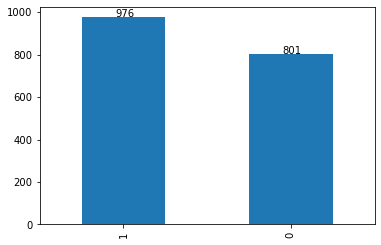

In [16]:
ups_and_downs = fin_df.y.value_counts()
ax = ups_and_downs.plot(kind = 'bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.2, p.get_height() * 1.005))

In [17]:
print(ups_and_downs / ups_and_downs.sum() * 100)

1    54.924029
0    45.075971
Name: y, dtype: float64


Slight disbalance but nothing concerning.

In [18]:
proc_fin_df = fin_df.dropna()[['Date', 'Close*', 'Volume', 'SMA', 'y']]
proc_fin_df.columns = ['Date', 'Price', 'Volume', 'SMA', 'y']

In [19]:
print(proc_fin_df.shape)
proc_fin_df.head()

(1777, 5)


,Date,Price,Volume,SMA,y
1776,2013-01-10,1472.12,4081840000,1462.920000,1
1775,2013-01-11,1472.05,3340650000,1464.295714,0
1774,2013-01-14,1470.68,3003010000,1465.911429,0
1773,2013-01-15,1472.34,3135350000,1466.750000,1
1772,2013-01-16,1472.63,3384080000,1468.284286,1


In [20]:
print('Date range for Processed Financial Data: \n\nFrom', proc_fin_df.Date.min(), ' to ', proc_fin_df.Date.max())

Date range for Processed Financial Data: 

From 2013-01-10 00:00:00  to  2020-01-31 00:00:00


Our final financial dataset has 9 less observations and only four columns: Date, Price, Volume, and SMA10. With y being the dependent variable.

In [21]:
proc_fin_df.set_index('Date', inplace = True)

## 2.2 News Data Processing

Note that the total dataset is 8.5 Gb - which is very heavy and time-consuming to load and preprocess. *Note to self: alternatives to pandas; save in hdfs format; less data (?)*

1. Following paper's preprocessing (p. 18) we are selecting only important columns: date, title, section, and publication
2. Publishers with unknown section columns are replaced with "unknown" (p. 19)
3. Filter to use **only** financial and business-related section and **separately** all the news articles with unknown sections

Turns out most tedious part is to identify which sections are business-related and which ones are not. To bypass this issue (and not to look through all the sections amnually) we are going to gather all financial terms and screen through all sections if they contain at least one financial terms and / or abbreviations.

Complications:
- depression (how to treat this word)

This dataset contains 2,688,878 news articles and essays from 27 American publications, spanning January 1, 2016 to April 2, 2020. **The original paper had news articles had news articles spanning from 2013 through 2020**.

In [22]:
news_data_path = Path(r"data\all-the-news-2-1.csv")

In [23]:
news_df = pd.read_csv(news_data_path)

In [24]:
print(news_df.shape)
news_df.head()

(2688878, 10)


,date,year,month,day,author,title,article,url,section,publication
0,2016-12-09 18:31:00,2016,12.0,9,Lee Drutman,We should take concerns about the health of li...,"This post is part of Polyarchy, an independent...",https://www.vox.com/polyarchy/2016/12/9/138983...,NaN,Vox
1,2016-10-07 21:26:46,2016,10.0,7,Scott Davis,Colts GM Ryan Grigson says Andrew Luck's contr...,The Indianapolis Colts made Andrew Luck the h...,https://www.businessinsider.com/colts-gm-ryan-...,NaN,Business Insider
2,2018-01-26 00:00:00,2018,1.0,26,NaN,Trump denies report he ordered Mueller fired,"DAVOS, Switzerland (Reuters) - U.S. President ...",https://www.reuters.com/article/us-davos-meeti...,Davos,Reuters
3,2019-06-27 00:00:00,2019,6.0,27,NaN,France's Sarkozy reveals his 'Passions' but in...,PARIS (Reuters) - Former French president Nico...,https://www.reuters.com/article/france-politic...,World News,Reuters
4,2016-01-27 00:00:00,2016,1.0,27,NaN,Paris Hilton: Woman In Black For Uncle Monty's...,Paris Hilton arrived at LAX Wednesday dressed ...,https://www.tmz.com/2016/01/27/paris-hilton-mo...,NaN,TMZ


In [25]:
# date, title, section, and publication
proc_news_df = news_df[['date', 'title', 'section', 'publication']]

In [26]:
proc_news_df.loc[proc_news_df.section.isna(), 'section'] = 'unknown'

C:\Users\nikita.yatchenko\AppData\Local\Temp\ipykernel_92\1475256562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proc_news_df.loc[proc_news_df.section.isna(), 'section'] = 'unknown'


In [27]:
proc_news_df.loc[:,'date'] = pd.to_datetime(proc_news_df.date)
proc_news_df.loc[:,'date'] = proc_news_df.date.dt.date

C:\Users\nikita.yatchenko\AppData\Local\Temp\ipykernel_92\103969730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proc_news_df.loc[:,'date'] = pd.to_datetime(proc_news_df.date)
C:\Users\nikita.yatchenko\AppData\Local\Temp\ipykernel_92\103969730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proc_news_df.loc[:,'date'] = proc_news_df.date.dt.date


In [28]:
proc_news_df.title

0          We should take concerns about the health of li...
1          Colts GM Ryan Grigson says Andrew Luck's contr...
2               Trump denies report he ordered Mueller fired
3          France's Sarkozy reveals his 'Passions' but in...
4          Paris Hilton: Woman In Black For Uncle Monty's...
                                 ...                        
2688873    Florida Ammo Selling Out On Heels of Stay-At-H...
2688874    Disney Forcing Annual Pass Holders to Continue...
2688875    Nick Cannon Pimps Out His Impala with Custom N...
2688876    Pete Buttigieg Says Governors Showing More Lea...
2688877    Ruth Bader Ginsburg Still Working Out with Tra...
Name: title, Length: 2688878, dtype: object

In [29]:
# get sentiment
def find_pol(text):
    if not type(text) is str:
        return np.nan
    return TextBlob(text).sentiment.polarity

In [30]:
proc_news_df.loc[:, 'sentiment'] = proc_news_df.title.apply(lambda x: find_pol(x))

C:\Users\nikita.yatchenko\AppData\Local\Temp\ipykernel_92\1137761844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proc_news_df.loc[:, 'sentiment'] = proc_news_df.title.apply(lambda x: find_pol(x))


In [31]:
proc_news_df.head()

,date,title,section,publication,sentiment
0,2016-12-09,We should take concerns about the health of li...,unknown,Vox,-0.333333
1,2016-10-07,Colts GM Ryan Grigson says Andrew Luck's contr...,unknown,Business Insider,-0.500000
2,2018-01-26,Trump denies report he ordered Mueller fired,Davos,Reuters,0.000000
3,2019-06-27,France's Sarkozy reveals his 'Passions' but in...,World News,Reuters,0.000000
4,2016-01-27,Paris Hilton: Woman In Black For Uncle Monty's...,unknown,TMZ,-0.166667


In [32]:
proc_news_df.dtypes

date            object
title           object
section         object
publication     object
sentiment      float64
dtype: object

In [33]:
proc_news_df = proc_news_df[~proc_news_df.title.isna()]

In [34]:
proc_news_df.shape[0]

2688841

In [35]:
group_all_news_sent = proc_news_df.groupby('date')['sentiment'].mean()

<AxesSubplot:xlabel='date'>

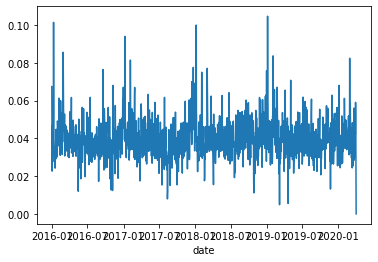

In [36]:
group_all_news_sent.plot()

In [37]:
print('Date range for Processed News Data: \n\nFrom', group_all_news_sent.index.min(), ' to ', group_all_news_sent.index.max())

Date range for Processed News Data: 

From 2016-01-01  to  2020-04-02


## 2.2.1 Subset of financial news
The paper doesn't go into detail how the authoer selected financial / business related sections. Main questions are what is business news? Is Aesrospace & Defense business news? What about Marketing news? These questions are both hard to asnwer definitively and the answer is dependent on the methodology. In my opinion, if an industry has a big impact on the market - yes, it should be included.

The apporach we are taking is looking throguh top unique sections that make up more than 90% of total articles and including all terms that are finance and business-related. We then use these terms to look through all the sections.

In [38]:
all_section_analysis = proc_news_df.section.value_counts()

In [39]:
unique_sections = proc_news_df.section.unique().tolist()

In [40]:
all_section_analysis[:100].sum() / all_section_analysis.sum()

0.8902482519420077

In [41]:
# look through top 100 popular sections to  make sure we got all financial & business terms

np.array(all_section_analysis[:100].index.tolist()[0:10]) # first 10 not to spam

array(['unknown', 'Market News', 'World News', 'Business News', 'Wires',
       'Financials', 'politics', 'us', 'Intel', 'Bonds News'],
      dtype='<U13')

In [42]:
unique_fin_bus_terms = [
    'fina', 'busine', 'bond', 'fund', 'equities', 'equity', 'market', 'stock', 'bank', 'deal', 'industr', 
    'hedge', 'arbitra', 'econ', 'ipo', 'press release', 'invest',  'account', 'debt', 'loan',
    'rate', 'reserve', 'option', 'futures', 'commodit', 'insider', 'etf', 'cpi',
    'budget', 'buyback', 'corp', 'merge', 'acquis', 'inflation', 'depression', 'enterpr', 'tax', 'portfolio', 'capital',
    'compan', 'execut', 'annual', 'consumer', 'tech', 'energy', 'wealth', 'ionaire', 'money', 'pension', 'reit', 
    'profit', 'nomics', 'buy', 'rich', 'alpha', 'income', 'trust', 'intel', 'goog', 'wire', 'labor', 'labour'
]

exchange = ['dollar', 'coin', 'crypto', 'pound', 'currency', 'exchange', 'yuan', 'euro']

secondary_fin_terms = ['aerosp', 'job', 'davos', 'brexit', 'services', 'manufact', ]

In [43]:
def fin_bus_present(section, terms):
    if not type(section) is str or '-' in section: return None
    section_proc = section.lower()
    for term in terms:
        if term in section_proc:
            return section

In [44]:
sections = proc_news_df.section.unique()
bus_fin_sections = []
for section in sections:
    fin_bus = fin_bus_present(section, unique_fin_bus_terms + exchange + secondary_fin_terms)
    if fin_bus is not None: bus_fin_sections.append(fin_bus)
    else: continue

In [45]:
len(bus_fin_sections)

365

a total of 365 unnique sections are somewhat finance and / or business related - less than 10% of total unique sections

In [46]:
mask = proc_news_df.section.isin(bus_fin_sections)

In [47]:
proc_fin_news_df = proc_news_df[mask]
proc_fin_news_df.head()

,date,title,section,publication,sentiment
2,2018-01-26,Trump denies report he ordered Mueller fired,Davos,Reuters,0.0
5,2019-06-17,"ECB's Coeure: If we decide to cut rates, we'd ...",Financials,Reuters,0.0
11,2019-06-23,Hudson's Bay's chairman's buyout bid pits reta...,Business News,Reuters,0.2
22,2018-12-28,Wells Fargo to pay $575 million in settlement ...,Business News,Reuters,0.0
24,2019-05-21,Factbox: Investments by automakers in the U.S....,Business News,Reuters,0.0


In [48]:
section_analysis = proc_fin_news_df.section.value_counts()
sum(section_analysis[section_analysis>1][0:30] / section_analysis.sum())

0.9121251850285474

In [49]:
np.array(section_analysis[section_analysis>1][0:30].index)

array(['Market News', 'Business News', 'Wires', 'Financials', 'Intel',
       'Bonds News', 'Consumer Goods and Retail', 'business', 'Tech',
       'Commodities', 'Deals', 'Tech by VICE', 'Technology News',
       'Company News', 'Energy', 'Funds News', 'Cyclical Consumer Goods',
       'Brexit', 'IT Services & Consulting', 'Industrials', 'Markets',
       'Market Insider', 'Google', 'Wealth', 'Hot Stocks',
       'Switzerland Market Report', 'Davos', 'technology', 'Investing',
       'Chinese Labor Unrest'], dtype=object)

Top 30 sections are all financials and comprise 90% of all articles chosen for financial and business related. THerefore, it is acceptable to use these articles as our main basis for financial and business related news.

In [50]:
group_fin_news_sent = proc_fin_news_df.groupby('date')['sentiment'].mean()

In [51]:
pd.concat([group_all_news_sent, group_fin_news_sent], axis = 1)

,sentiment,sentiment
date,,
2016-01-01,0.067362,0.030200
2016-01-02,0.047316,0.062336
2016-01-03,0.022663,-0.011691
2016-01-04,0.042950,0.012770
2016-01-05,0.047019,0.042992
...,...,...
2020-03-29,0.042033,0.042206
2020-03-30,0.059045,0.024842
2020-03-31,0.050988,0.025788


<AxesSubplot:xlabel='date'>

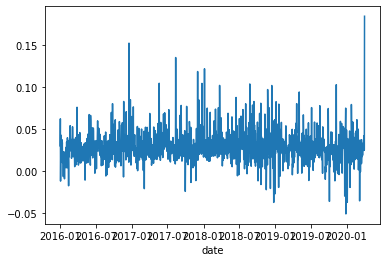

In [52]:
group_fin_news_sent.plot()

In [53]:
print('Date range for Processed News Data: \n\nFrom', group_fin_news_sent.index.min(), ' to ', group_fin_news_sent.index.max())

Date range for Processed News Data: 

From 2016-01-01  to  2020-04-01


## 2.2.2 News Dataset Discussion
One of the main critiques of using a general sentiment score - is how vague and unspecific it is. For example - new re interest rate cuts is generally a net positive on the stock valuations (market seems to go up). However as shown below - the sentiment is neutral.

In [54]:
print(proc_fin_news_df.iloc[1].title)
print('sentiment: ', proc_fin_news_df.iloc[1].sentiment)

ECB's Coeure: If we decide to cut rates, we'd have to consider tiering
sentiment:  0.0


## 2.3 Train, Validation and Test Data Preparation and Discussion
A vital process for fine modeling is tran, validation, and test data preparation. Using general best practices (same as in the paper) we will split the datset into 80% train and 20% test. Usually, when working with time series we do not apply randomization (random selection of samples) since there is an inherent structure of the time series that we want to preserve. However, this is not really a times series modeling exercise - this is classification, so here we can use randomization.

First, we **must** be on the lookout for data leakage. 
1. SMA. Does it tell us anything about the future? No, it doesn't, as it looks backwards. **However**, our dependent variable is looking backwards and when we combine Close price of today and the fact that the previous Close is included in the SMA - we have data leakage (something the paper doesn't address).
2. Another place where the leakage could occur is the time zone difference between the news article release and the stock price record. 

We proceed under the assumption that there is no data leakage for the purposes of validating results - however **further testing and dataset validation are advised**.

In [55]:
total_df = proc_fin_df.merge(right = group_fin_news_sent, how = 'left', left_index = True, right_index = True)
total_df = total_df[['Price','Volume','SMA','sentiment','y']]

In [56]:
total_df.isna().sum(axis = 1).sum()

750

In [57]:
# subseting data to have news sentiment for every day (news dataset's range start on 01-01-2016)
avail_total_df = total_df[total_df.index >= '2016-01-01']

In [58]:
avail_total_df.isna().sum(axis = 1).sum() # no na's

0

In [59]:
X = avail_total_df.iloc[:, :-1]
y = avail_total_df.iloc[:, -1]

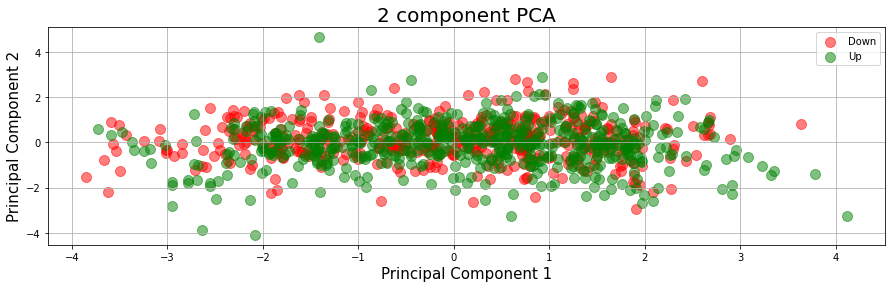

In [60]:
# Quick datavis
pca = PCA(n_components=2)

def scale(data):
    sc = StandardScaler()
    data = sc.fit_transform(data)
    return data

principalComponents = pca.fit_transform(scale(X))
y_pca = y.values.ravel()

fig, ax = plt.subplots(figsize = (15,4))
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

alpha = 0.5
ax.scatter(principalComponents[y_pca == 0, 0], principalComponents[y_pca == 0, 1], s = 100, c = 'red', label = 'Down', alpha = alpha)
ax.scatter(principalComponents[y_pca == 1, 0], principalComponents[y_pca == 1, 1], s = 100, c = 'green', label = 'Up', alpha = alpha)
ax.grid()
ax.legend()
plt.show()

PCA doesn't look too promising - no easy way to see any data separation, patterns or clusters

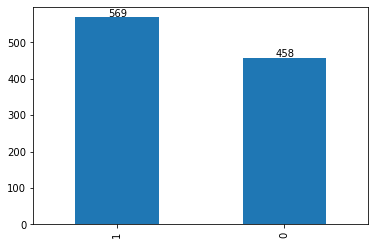

In [61]:
ups_and_downs = y.value_counts()
ax = ups_and_downs.plot(kind = 'bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.2, p.get_height() * 1.005))

In [62]:
print(ups_and_downs / ups_and_downs.sum() * 100)

1    55.40409
0    44.59591
Name: y, dtype: float64


Again, slight disbalance, nothing too concerning. The author of the original paper addresses this issue by optimizing for the ROC-AUC (p. 22). 

One issue that I found was that the paper claims that the dataset contained 589 observations of 0's and 480 observations of 1's (p. 20). We almost have the opposite in our dataset. This is concerning - **potentially** a mistake in the paper.

No missing values since 2016

In [63]:
X_path = Path(r"data\X.csv")
X.to_csv(X_path)

y_path = Path(r"data\y.csv")
y.to_csv(y_path)

In [64]:
X_path = Path(r"data\X.csv")
X = pd.read_csv(X_path)
X.set_index('Date', inplace = True)

y_path = Path(r"data\y.csv")
y = pd.read_csv(y_path)
y.set_index('Date', inplace = True)

In [65]:
data = X.merge(y, left_index = True, right_index = True)

In [66]:
data.head()

,Price,Volume,SMA,sentiment,y
Date,,,,,
2016-01-04,2012.66,4304880000,2054.300000,0.012770,0
2016-01-05,2016.71,3706620000,2047.502857,0.042992,1
2016-01-06,1990.26,4336660000,2037.398571,0.027809,0
2016-01-07,1943.09,5076590000,2021.197143,0.017907,0
2016-01-08,1922.03,4664940000,1998.864286,0.021539,0


In [4]:
data.head()

,Price,Volume,SMA,sentiment,y
Date,,,,,
2016-01-04,2012.66,4304880000,2054.300000,0.010684,0
2016-01-05,2016.71,3706620000,2047.502857,0.049527,1
2016-01-06,1990.26,4336660000,2037.398571,0.031793,0
2016-01-07,1943.09,5076590000,2021.197143,0.018238,0
2016-01-08,1922.03,4664940000,1998.864286,0.025096,0


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 101, stratify = y, shuffle = True)

In [68]:
X_train.shape

(821, 4)

## 3. Model
In all cases we use SVM. It is also our task to determine optimal hyperparameters.

Section 3.0 - training baseline models - TA and only News SVM models. 

Section 3.1 - News + TA


### Tuning
Throughout each section we are going to perform hyperparameter tuning. In the paper's section 4.2.3 the author outlines a very high-level approach to hyperparameter tuning. The only thing we know for certain is that he utilized the grid search method - meaning he looped through all combinations of hyperparameters. We do not exactly know which combinations he tried. The only piece of information we have is the most optimal combination of hyperparameters. Therefore, we are going to expand the universe of possible parameters by a lot.

On p.20 the author referred us to a stratifed 10-fold cross-validation - therefore when tuning we will use just that.

Below we package hyperparameter process into a function so that we repeat the same process for each scenario and maintain the same approach throughout.

### Scoring
Another point of contention with the paper is the use of ROC AUC and PR AUC for SVM. SVM doesn't output probabilities (they can with an expensive additional cross validation procedure) - therefore, it is strange for him to include this discussion without specifying how he obtained those probabilities and, therefore, the trade-off between precision and recall. How would one achieve a trade-off - what are we varying when implementing SVM? Typically, it is a threshold for probabilities (binary classification) - but in the case of SVM - what is it? How does the author calculate the metric? Lastly, why even bother with this metric? Benefits of using precision-recall auc:
- when the data is heavily disbalanced
- you care about positve class more than the negative (but we do care about the negative class)

We are going to assume that PR_AUC is calculated from a decision function by varying the distance from the separating hyperplane required to be 0 or 1. Below we have created a custom scorer that does just that.

In [69]:
balance = 'balanced' # None

In [70]:
def custom_pr_re_scorer(classifier, X, y):
    y_score = classifier.decision_function(X)
    clf_precision, clf_recall, _ = precision_recall_curve(y, y_score)
    clf_pr_re_auc = auc(clf_recall, clf_precision)

    return clf_pr_re_auc

In [71]:
def hyper_tuning_SVM(X_train, y_train, X_test, y_test, params, scaling = True):
    if scaling:
        train_scaler = StandardScaler()
        train_scaler.fit(X_train) 

        X_train_sc = train_scaler.transform(X_train)
        X_test_sc = train_scaler.transform(X_test)
    else:
        X_train_sc = X_train
        X_test_sc = X_test
        
    svm_model = svm.SVC(class_weight = balance)

    clf = GridSearchCV(svm_model, params, scoring = custom_pr_re_scorer, cv = 10, verbose = 1, refit = True)
    clf.fit(X_train_sc, y_train.values.ravel())

    best_score = clf.best_score_

    best_params = clf.best_params_

    y_pred = clf.predict(X_test_sc)
    cm=confusion_matrix(y_test,y_pred)
    cm = cm / cm.sum(axis=1)[:, None] * 100

    train_accuracy = accuracy_score(y_train,clf.predict(X_train_sc))
    train_pr_re_auc = custom_pr_re_scorer(clf, X_train_sc, y_train)
    
    test_accuracy = accuracy_score(y_test, clf.predict(X_test_sc))
    test_pr_re_auc = custom_pr_re_scorer(clf, X_test_sc, y_test)
    
    result = {
        'optimized_svm': clf,
        'train_acc': train_accuracy,
        'train_pr_re_auc': train_pr_re_auc,
        'test_acc': test_accuracy,
        'test_pr_re_auc': test_pr_re_auc,
        'confusion_matrix': cm,
        'best_score': best_score,
        'best_params': best_params,
             }
    
    return result

In [72]:
def print_cm(cm):
    df_cm = pd.DataFrame(cm, index = [0,1], columns = [0,1])
    plt.figure(figsize = (5,3))
    sns.heatmap(df_cm, annot=True, fmt='.1f')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [73]:
param_grid = [
        {'C': [1, 10, 100, 1000, 1500], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']},
        {'C': [1, 10, 100, 1000, 1500], 'kernel': ['linear'], 'gamma': [1]}, # gamma is a filler - does nothing
        {'C': [1, 10, 100, 1000], 'degree': [3, 4, 5], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['poly']},
        {'C': [1, 10, 100, 1000], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['sigmoid']},
     ]

Bootstraping. To evaluate whether what we are achieve differs significantly from what the author published we are going to perform hythopesis teting with bootstraping.

Bootstraping procedure that we use:
1. Going to repeat resampling 1,000 times
2. Sample 50% of data
3. Train a model with our parameters and the parameters from the paper
4. Report corresponding confidence interval and evaluate whether author's reported accuracy lies within the interval

In [74]:
boot_n_iters = 1000
alpha = 0.95
updates_every = 100
n_size_prop = 0.5
arr = np.arange(10000)
np.random.seed(18)
np.random.shuffle(arr)
pseudo_random_numbers = arr[5000:6000] # generate random seeds for bootstrap reproducibility

In [76]:
len(pseudo_random_numbers)

1000

In [77]:
def bootstrap_ci(n_iters, svm_params, selected_data, n_size_prop = 0.5, alpha = 0.95, updates_every = 10):
    '''
        inputs:
            - n_inters: number of bootstrap iterations
            - svm_params: parameters for svm model
            - selected_data
            - n_size_prop: size of train sample
            - alpha: 
            - updates_every:
        output:
            - results - list of stats, conf_interval
    '''
    # configure bootstrap
    n_size = int(len(data) * n_size_prop)
    # run bootstrap
    stats_pr_re_auc = list()
    stats_accuracy = list()
    for i in range(n_iters):
        # know where we are in the process
        if i % updates_every == 0:
            print(i, end='\r', flush=True)
        
        # prepare train and test sets
        train = resample(selected_data.values, n_samples=n_size, random_state = pseudo_random_numbers[i])
        test = np.array([x for x in selected_data.values if x.tolist() not in train.tolist()])
        
        # fit model
        X_boot_tr = train[:,:-1]
        y_boot_tr = train[:,-1]

        X_boot_tst = test[:,:-1]
        y_boot_tst = test[:,-1]

        train_scaler = StandardScaler()
        train_scaler.fit(X_boot_tr) 

        X_boot_tr_sc = train_scaler.transform(X_boot_tr)
        X_boot_tst_sc = train_scaler.transform(X_boot_tst)

        svm_model = svm.SVC(kernel = svm_params['kernel'], 
                            C = svm_params['C'], 
                            gamma = svm_params['gamma'], 
                            class_weight = balance,
                           ) # class_weight = 'balanced'
        svm_model.fit(X_boot_tr_sc, y_boot_tr)

        # evaluate model
        predictions = svm_model.predict(X_boot_tst_sc)
        accuracy = accuracy_score(y_boot_tst, predictions)
        pr_re_auc = custom_pr_re_scorer(svm_model, X_boot_tst_sc, y_boot_tst)
        
        stats_accuracy.append(accuracy)
        stats_pr_re_auc.append(pr_re_auc)
        
    
    # confidence intervals accuracy
    p = ((1.0-alpha)/2.0) * 100
    acc_lower = max(0.0, np.percentile(stats_accuracy, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    acc_upper = min(1.0, np.percentile(stats_accuracy, p))
    
    # confidence intervals precision recall auc
    p = ((1.0-alpha)/2.0) * 100
    pr_re_auc_lower = max(0.0, np.percentile(stats_pr_re_auc, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    pr_re_auc_upper = min(1.0, np.percentile(stats_pr_re_auc, p))
    
    results = {'accuracy_stats': stats_accuracy, 'accuracy_conf_int': [acc_lower, acc_upper],
               'precision_recall_auc_stats': stats_pr_re_auc, 'precision_recall_auc_conf_int': [pr_re_auc_lower, pr_re_auc_upper],
              }
    
    return results

In [78]:
def plot_scores(boot_dict):
#     if which == 'accuracy':
#         stats = 'accuracy_stats'
#         conf = 'accuracy_conf_int'
#     elif which == 'precision_recall_auc':
#         stats = 'precision_recall_auc_stats'
#         conf = 'precision_recall_auc_conf_int'
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
    
    axes[0].hist(boot_dict['accuracy_stats'])
    lower = boot_dict['accuracy_conf_int'][0]
    upper = boot_dict['accuracy_conf_int'][1]
    axes[0].set_title('Accuracy %.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))
    
    axes[1].hist(boot_dict['precision_recall_auc_stats'])
    lower = boot_dict['precision_recall_auc_conf_int'][0]
    upper = boot_dict['precision_recall_auc_conf_int'][1]
    axes[1].set_title('Precision Recall AUC %.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))
    
    fig.tight_layout()

    plt.show()

In [79]:
# plot_scores(boot_results_ta)

### 3.0 Baselines (TA, News) - SVM Model
- 3.0.1 section covers only technical analysis model
- 3.0.2 section covers only news sentiment model

### 3.0.1 Baseline TA - SVM Model

In [80]:
X.columns

Index(['Price', 'Volume', 'SMA', 'sentiment'], dtype='object')

In [81]:
X_tr = X_train.iloc[:, 0:3] # Price Volume SMA
X_tst = X_test.iloc[:, 0:3]

TA_results = hyper_tuning_SVM(X_tr, y_train, X_tst, y_test, param_grid)

Fitting 10 folds for each of 68 candidates, totalling 680 fits


In [82]:
print(TA_results['best_params'])

{'C': 100, 'gamma': 1, 'kernel': 'linear'}


In [83]:
TA_train_accuracy = TA_results['train_acc']
print('TA_train accuracy: ', TA_train_accuracy)
TA_train_pr_re_auc = TA_results['train_pr_re_auc']
print('TA_train pr_re_auc: ', TA_train_pr_re_auc)

print('\n')

TA_test_accuracy = TA_results['test_acc']
print('TA_test accuracy: ',TA_test_accuracy)
TA_test_pr_re_auc = TA_results['test_pr_re_auc']
print('TA_test pr_re_auc: ', TA_test_pr_re_auc)

TA_train accuracy:  0.7064555420219245
TA_train pr_re_auc:  0.7918654708632182


TA_test accuracy:  0.6941747572815534
TA_test pr_re_auc:  0.779491541911544


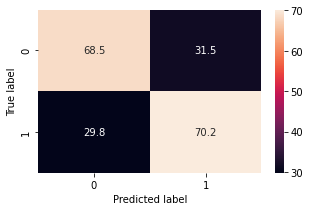

In [84]:
print_cm(TA_results['confusion_matrix'])

Unsurprisingly, TA performs rather well (potential leakage + there is a lot of research showing TA's effectivenes).

### 3.0.1.1 Accuracy Confidence Interval

Using bootstraping procedure to test our best found parameters and paper's

In [85]:
svm_params = TA_results['best_params']

In [86]:
boot_results_ta = bootstrap_ci(boot_n_iters, svm_params, data.drop('sentiment', axis = 1), 
                               updates_every = updates_every)

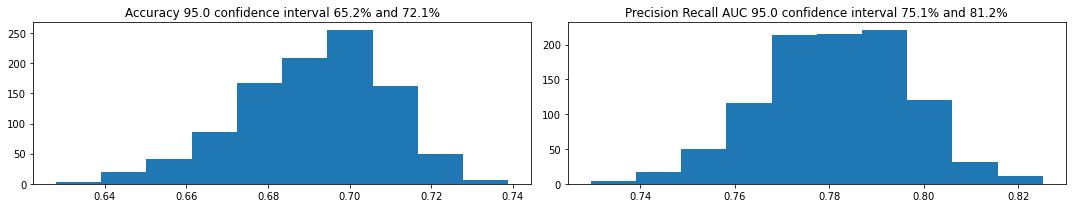

In [87]:
# plot scores and confidence intervals
plot_scores(boot_results_ta)

Author's reported TA's precision recall auc is 0.71, which is outside of the confidence interval that we estimated. This could potentially be a sample selection bias on the part of the author. He reports a point estimate without providing a range of suitable values. Therefore, it could be the case that his particular model's precision recall auc score was outside our 95% CI interval.

### 3.0.2 Baseline News - SVM Model

In [88]:
X.columns

Index(['Price', 'Volume', 'SMA', 'sentiment'], dtype='object')

In [89]:
X_tr = X_train.iloc[:, 3].values.reshape(-1, 1) # just the sentiment
X_tst = X_test.iloc[:, 3].values.reshape(-1, 1)

news_results = hyper_tuning_SVM(X_tr, y_train, X_tst, y_test, param_grid)

Fitting 10 folds for each of 68 candidates, totalling 680 fits


In [90]:
print(news_results['best_params'])

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


In [91]:
news_train_accuracy = news_results['train_acc']
print('news_train accuracy: ', news_train_accuracy)
news_train_pr_re_auc = news_results['train_pr_re_auc']
print('news_train pr_re_auc: ', news_train_pr_re_auc)

print('\n')

news_test_accuracy = news_results['test_acc']
print('news_test accuracy: ', news_test_accuracy)
news_test_pr_re_auc = news_results['test_pr_re_auc']
print('news_test pr_re_auc: ', news_test_pr_re_auc)

news_train accuracy:  0.5651644336175395
news_train pr_re_auc:  0.6291176584286152


news_test accuracy:  0.5485436893203883
news_test pr_re_auc:  0.650912516036243


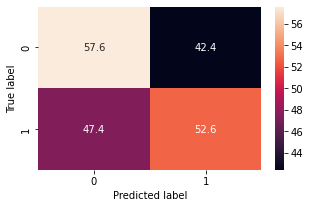

In [92]:
print_cm(news_results['confusion_matrix'])

Rahter poor performance on the key independent variable. The paper on reports the misleading precision recall auc score. The confusion matrix above tells us that news sentiment of the financial and business related sections perform mildly better than a simple coin toss.

### 3.0.2.1 Accuracy Confidence Interval

Using bootstraping procedure to test our best found parameters for the News only model

In [93]:
svm_params = news_results['best_params']

In [94]:
boot_results_news = bootstrap_ci(boot_n_iters, svm_params, data.drop(data.columns[0:3].values, axis = 1),
                                 updates_every = updates_every)

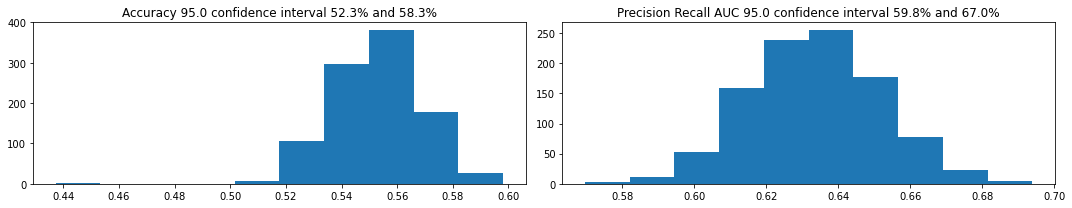

In [95]:
# plot scores and confidence intervals
plot_scores(boot_results_news)

From the above plots, technically, we cannot reject the null hypothesis that this is purely random (50% accuracy). And yes, the author's TextBlob precision recall auc (p.23) is within the confidence intervall that we obtained.

### 3.1 News (fin + bus) + TA - SVM Model

Using paper's best parameters

train accuracy:  0.6674786845310596
train auc precision recall:  0.7809971643746755


test accuracy:  0.6650485436893204
train auc precision recall:  0.7782718522688965


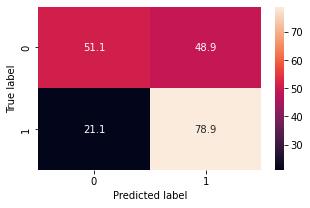

In [96]:
train_scaler = StandardScaler()
train_scaler.fit(X_train)

X_train_sc = train_scaler.transform(X_train)
X_test_sc = train_scaler.transform(X_test)

clf = svm.SVC(kernel = 'rbf', C = 100, gamma = 0.01, class_weight = balance)
clf.fit(X_train_sc, y_train.values.ravel())

y_pred = clf.predict(X_test_sc)
cm=confusion_matrix(y_test,y_pred)
cm = cm / cm.sum(axis=1)[:, None] * 100

print_cm(cm)

train_accuracy = accuracy_score(y_train,clf.predict(X_train_sc))
print('train accuracy: ', train_accuracy)
print('train auc precision recall: ', custom_pr_re_scorer(clf, X_train_sc, y_train))

print('\n')

test_accuracy = accuracy_score(y_test,clf.predict(X_test_sc))
print('test accuracy: ', test_accuracy)
print('train auc precision recall: ', custom_pr_re_scorer(clf, X_test_sc, y_test))

### 3.1.1 Hyperparameter optimization (4.2.3)

In [97]:
X_tr = X_train # all columns
X_tst = X_test

ta_news_results = hyper_tuning_SVM(X_tr, y_train, X_tst, y_test, param_grid, scaling = True)

Fitting 10 folds for each of 68 candidates, totalling 680 fits


In [98]:
print(ta_news_results['best_params'])

{'C': 1000, 'gamma': 1, 'kernel': 'linear'}


In [99]:
ta_news_train_accuracy = ta_news_results['train_acc']
print('ta_news_train accuracy: ', ta_news_train_accuracy)
ta_news_train_pr_re_auc = ta_news_results['train_pr_re_auc']
print('ta_news_train pr_re_auc: ', ta_news_train_pr_re_auc)

print('\n')

ta_news_test_accuracy = ta_news_results['test_acc']
print('ta_news_test accuracy: ', ta_news_test_accuracy)
ta_news_test_pr_re_auc = ta_news_results['test_pr_re_auc']
print('ta_news_test pr_re_auc: ', ta_news_test_pr_re_auc)

ta_news_train accuracy:  0.6894031668696712
ta_news_train pr_re_auc:  0.7949567258654331


ta_news_test accuracy:  0.6796116504854369
ta_news_test pr_re_auc:  0.7729859252761531


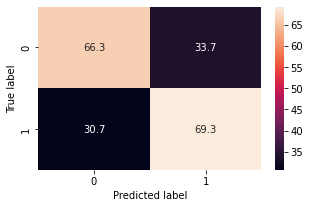

In [100]:
print_cm(ta_news_results['confusion_matrix'])

Adding news information seemed to only increase the bias and therefore we see a worsening of the results from the TA only model performance.

### 3.1.2 Accuracy Confidence Interval

Using bootstraping procedure to test our best found parameters for the News + TA model

In [101]:
svm_params = ta_news_results['best_params']

In [102]:
boot_results_ta_news = bootstrap_ci(boot_n_iters, svm_params, data,
                                 updates_every = updates_every)

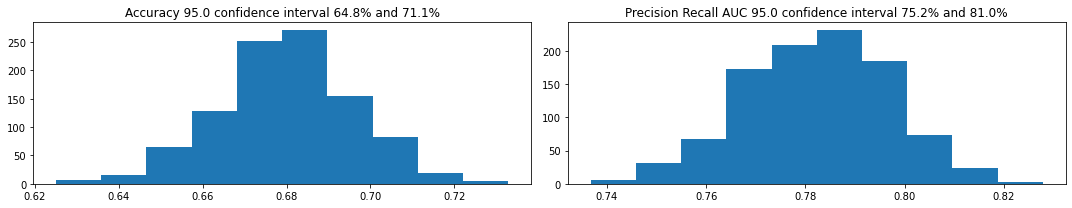

In [103]:
# plot scores and confidence intervals
plot_scores(boot_results_ta_news)

Using paper's best parameters

In [104]:
svm_params = {'kernel': 'rbf', 'C': 100, 'gamma': 0.01}

In [105]:
boot_results_ta_news_paper = bootstrap_ci(boot_n_iters, svm_params, data,
                                 updates_every = updates_every)

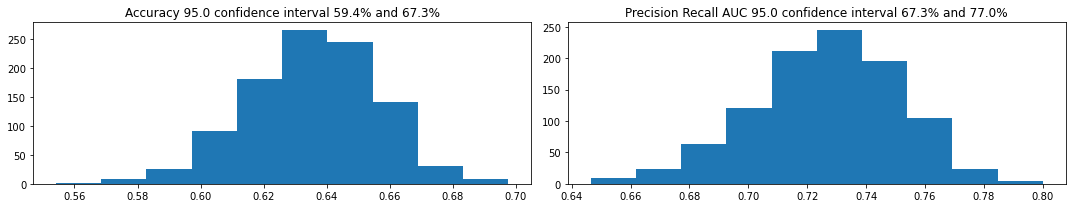

In [106]:
# plot scores and confidence intervals
plot_scores(boot_results_ta_news_paper)

Author's reported point estimate of 0.75 is within our 95% CI interval for the precision recall auc.

## 4. Results
In this section we compile all the results from the modelling section into one visual and report our findings. Although the author doesn't explicitly state that he evaluated all his models on the test dataset - we are going to assume that the results on p. 23 and p. 24 were obtained from not the training, but the test dataset.

In [107]:
def round_list(l):
    return str(round(l[0], 3)) + ' - ' + str(round(l[1], 3))

In [108]:
results_df = pd.DataFrame(data = {
                        'accuracy': [round(TA_test_accuracy, 3), round(news_test_accuracy, 3), round(ta_news_test_accuracy, 3)],
                        'accuracy 95% CI': [round_list(boot_results_ta['accuracy_conf_int']), 
                                            round_list(boot_results_news['accuracy_conf_int']), 
                                            round_list(boot_results_ta_news['accuracy_conf_int']),
                                           ],
                        'precision_recall_auc':  [round(TA_test_pr_re_auc, 3), round(news_test_pr_re_auc, 3), round(ta_news_test_pr_re_auc, 3)],
                        'precision_recall_auc 95% CI': [round_list(boot_results_ta['precision_recall_auc_conf_int']), 
                                            round_list(boot_results_news['precision_recall_auc_conf_int']), 
                                            round_list(boot_results_ta_news['precision_recall_auc_conf_int']),
                                           ],                                }, 
                          index = ['TA - SVM', 'News - SVM', 'News + TA - SVM'])

In [109]:
results_df

,accuracy,accuracy 95% CI,precision_recall_auc,precision_recall_auc 95% CI
TA - SVM,0.694,0.652 - 0.721,0.779,0.751 - 0.812
News - SVM,0.549,0.523 - 0.583,0.651,0.598 - 0.67
News + TA - SVM,0.680,0.648 - 0.711,0.773,0.752 - 0.81


Finally, let's compare two models: TA-only and News + TA. Again we are going to see if the difference in their accuracy or PR-AUC score is not 0.

In [110]:
svm_params_both = {
    'ta_only': TA_results['best_params'],
    'ta_news': ta_news_results['best_params']
             }

In [111]:
datam = {
    'ta_only': data.drop(data.columns[3], axis = 1),
    'ta_news': data
    }

In [112]:
datam.keys()

dict_keys(['ta_only', 'ta_news'])

In [113]:
# configure bootstrap
n_size = int(len(data) * n_size_prop)
# run bootstrap
stats_pr_re_auc = list()
stats_accuracy = list()
for i in range(boot_n_iters):
    # know where we are in the process
    if i % updates_every == 0:
        print(i, end='\r', flush=True)
    diff = {'ta_only': [], 'ta_news': []}
    for which in ['ta_only', 'ta_news']:
        selected_data = datam[which]
        svm_params = svm_params_both[which]
        # prepare train and test sets
        train = resample(selected_data.values, n_samples=n_size, random_state = pseudo_random_numbers[i])
        test = np.array([x for x in selected_data.values if x.tolist() not in train.tolist()])

        # fit model
        X_boot_tr = train[:,:-1]
        y_boot_tr = train[:,-1]

        X_boot_tst = test[:,:-1]
        y_boot_tst = test[:,-1]

        train_scaler = StandardScaler()
        train_scaler.fit(X_boot_tr) 

        X_boot_tr_sc = train_scaler.transform(X_boot_tr)
        X_boot_tst_sc = train_scaler.transform(X_boot_tst)


        svm_model = svm.SVC(kernel = svm_params['kernel'], 
                            C = svm_params['C'], 
                            gamma = svm_params['gamma'], 
                            class_weight = balance,
                           ) # class_weight = 'balanced'
        svm_model.fit(X_boot_tr_sc, y_boot_tr)

        # evaluate model
        predictions = svm_model.predict(X_boot_tst_sc)
        accuracy = accuracy_score(y_boot_tst, predictions)
        pr_re_auc = custom_pr_re_scorer(svm_model, X_boot_tst_sc, y_boot_tst)
        
        diff[which] = [accuracy, pr_re_auc]
    
    stats_accuracy.append(diff['ta_only'][0] - diff['ta_news'][0])
    stats_pr_re_auc.append(diff['ta_only'][1] - diff['ta_news'][1])


# confidence intervals accuracy
p = ((1.0-alpha)/2.0) * 100
acc_lower = max(0.0, np.percentile(stats_accuracy, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
acc_upper = min(1.0, np.percentile(stats_accuracy, p))

# confidence intervals precision recall auc
p = ((1.0-alpha)/2.0) * 100
pr_re_auc_lower = max(0.0, np.percentile(stats_pr_re_auc, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
pr_re_auc_upper = min(1.0, np.percentile(stats_pr_re_auc, p))

results = {'accuracy_stats': stats_accuracy, 'accuracy_conf_int': [acc_lower, acc_upper],
           'precision_recall_auc_stats': stats_pr_re_auc, 'precision_recall_auc_conf_int': [pr_re_auc_lower, pr_re_auc_upper],
          }

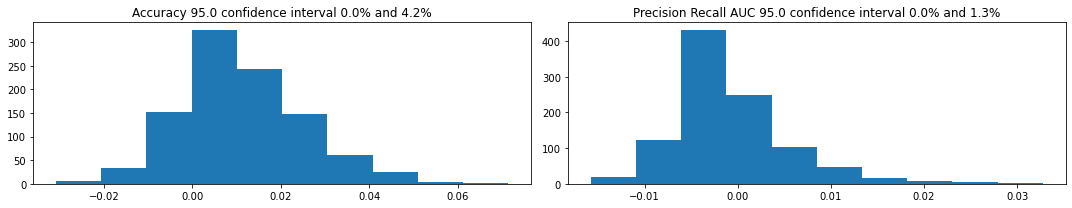

In [114]:
plot_scores(results)

## a. Appendix

In [115]:
unique_sections = proc_news_df.section.unique().tolist()

In [117]:
proc_sections = [ 'Davos', ...
 'James Corden is the worst']